In [302]:
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pandas as pd

In [303]:
def Euclidean(x,y):
    return np.sqrt(np.sum([(a - b) ** 2 for a, b in zip(x, y)]))

In [304]:
def Manhattan(x,y):
     return sum(abs(a-b) for a,b in zip(x,y))

In [311]:
def supremum(x,y):
    return round(max([abs(a-b) for a,b in zip(x,y)]),2)

In [306]:
def cosine_similarity(x,y):
    numerator = np.dot(x,y)
    denominator = (np.sqrt(np.sum([a ** 2 for a in x])))*(np.sqrt(np.sum([b ** 2 for b in y])))
    return numerator/denominator

In [307]:
def normalize(x):
    return [round(a/sum(x),4) for a in x]

In [308]:
data_list = [(1.5,1.7),(2,1.9),(1.6,1.8),(1.2,1.5),(1.5,1.0)]
x = (1.4,1.6)

In [314]:
[cosine_similarity(x, y) for y in data_list]

[0.999991391443956,
 0.9957522612528874,
 0.9999694838187877,
 0.9990282349375618,
 0.9653633930282662]

In [21]:
ss.rankdata([Euclidean(x, y) for y in data_list])

array([1., 5., 3., 2., 4.])

In [23]:
ss.rankdata([Manhattan(x, y) for y in data_list])

array([1., 5., 3., 2., 4.])

In [313]:
ss.rankdata([supremum(x, y) for y in data_list])

array([1. , 4.5, 2.5, 2.5, 4.5])

In [315]:
ss.rankdata([cosine_similarity(x, y) for y in data_list])

array([5., 2., 4., 3., 1.])

In [51]:
norm_data_list = [normalize(data) for data in data_list]
norm_x = normalize(x)

In [53]:
ss.rankdata([Euclidean(norm_x, y) for y in norm_data_list])

array([1., 4., 2., 3., 5.])

In [54]:
norm_x

[0.4667, 0.5333]

In [58]:
num_list = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 
            30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

In [59]:
def min_max_norm(x, num_list, new_min, new_max):
    orig_min = min(num_list)
    orig_max = max(num_list)
    
    return ((x - orig_min)/(orig_max - orig_min))*(new_max - new_min) + new_min

In [64]:
def z_score_norm(x, num_list, sd):
    return (x - np.mean(num_list))/sd

In [316]:
min_max_norm(35, num_list = num_list, new_min = 0, new_max = 1)

0.38596491228070173

In [317]:
z_score_norm(35, num_list = num_list, sd = 12.94)

0.38926097658709724

In [82]:
np.histogram(num_list, bins = np.arange(10,80,10))

(array([5, 9, 8, 3, 1, 1]), array([10, 20, 30, 40, 50, 60, 70]))

(array([5., 9., 8., 3., 1., 1.]),
 array([10, 20, 30, 40, 50, 60, 70]),
 <a list of 6 Patch objects>)

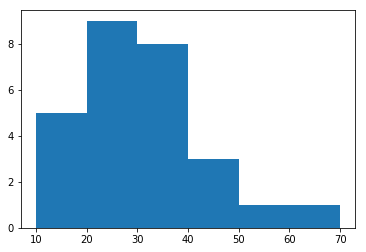

In [91]:
plt.hist(num_list, bins = np.arange(10,80,10), label = 'Equal-width Histogram')

In [96]:
np.random.choice(num_list, size = 5, replace = False)

array([40, 16, 35, 25, 20])

In [98]:
np.random.choice(num_list, size = 5, replace = True)

array([22, 16, 40, 16, 30])

## 3.13 (a)

In [236]:
A = np.random.randint(low=1, high=50, size=20)
B = np.random.randint(low=1, high=50, size=20)
C = np.random.randint(low=1, high=50, size=20)

In [237]:
A_unique = []
B_unique = []
C_unique = []

for a in A:
    if a not in A_unique:
        A_unique.append(a)

for b in B:
    if b not in B_unique:
        B_unique.append(b)
        
for c in C:
    if c not in C_unique:
        C_unique.append(c)

In [238]:
A_unique

[20, 14, 1, 38, 26, 46, 19, 8, 31, 42, 9, 6, 11, 24, 10, 12]

In [239]:
B_unique

[9, 4, 27, 42, 1, 16, 10, 33, 20, 28, 36, 38, 26, 17, 18]

In [240]:
C_unique

[5, 48, 43, 41, 21, 10, 38, 30, 44, 23, 26, 31, 8, 32, 42, 22, 47, 14]

In [242]:
concept_hierarchy = {'A': len(A_unique), 'B':len(B_unique), 'C':len(C_unique)}

In [244]:
sorted(concept_hierarchy.items(), key = lambda x : x[1])

[('B', 15), ('A', 16), ('C', 18)]

## 3.13 (b)

In [294]:
age_data = np.random.randint(low=1, high=50, size=34)
salary_data = np.random.randint(low=0, high=100, size=34)

In [295]:
# 3.13 - b
width_1 = 10
width_2 = 20
_min_1 = 0
_max_1 = 50
_min_2 = 0
_max_2 = 100

level_1 = int((_max_1 - _min_1)/width_1)
level_2 = int((_max_2 - _min_2)/width_2)
concept_hierarchy = {}

for i in range(1,level_1+1):
    concept_hierarchy[i] = {'Current':[]}
    for j in range(1, level_2+1):
        concept_hierarchy[i][j] = {'Current':[]}
    
cur_min_1 = _min_1
cur_max_1 = cur_min_1 + width_1
    
for i in range(1,level_1+1):
    for age in age_data:
        if age >= cur_min_1 and age < cur_max_1:
            if concept_hierarchy[i]:
                concept_hierarchy[i]['Current'].append(age)
            else:
                concept_hierarchy[i]['Current'] = [age]
        else:
            pass
    cur_min_1 = cur_max_1
    cur_max_1 = cur_min_1 + width_1
    
for i in range(1,level_1+1):
    # Reset min and max for level in hierarchy-2
    cur_min_2 = _min_2
    cur_max_2 = cur_min_2 + width_2
    # Obtain data points in current level in hierarchy-1
    curr_data_position = [x in concept_hierarchy[i]['Current'] for x in age_data]
    salary_data_sub = salary_data[curr_data_position]
    
    for j in range(1, level_2+1):
        for salary in salary_data_sub:
            if salary >= cur_min_2 and salary < cur_max_2:
                if concept_hierarchy[i][j]:
                    concept_hierarchy[i][j]['Current'].append(salary)
                else:
                    concept_hierarchy[i][j]['Current'] = [salary]
            else:
                pass
        cur_min_2 = cur_max_2
        cur_max_2 = cur_min_2 + width_2

In [296]:
age_data

array([ 3, 28, 29, 24,  4, 42, 47, 40, 16, 42,  9,  1, 28,  5, 36, 22, 49,
        8, 44, 32, 49, 47, 44, 48,  6, 45, 40, 33, 29, 18, 16, 10, 31, 42])

In [297]:
salary_data

array([77, 29, 43, 28, 83, 69, 22, 13, 22, 47, 50, 29,  7, 84, 59, 41, 41,
       35, 63, 74,  5, 22, 89, 78,  3, 53, 72, 15, 85, 26, 21, 42, 30, 82])

In [298]:
concept_hierarchy

{1: {'Current': [3, 4, 9, 1, 5, 8, 6],
  1: {'Current': [3]},
  2: {'Current': [29, 35]},
  3: {'Current': [50]},
  4: {'Current': [77]},
  5: {'Current': [83, 84]}},
 2: {'Current': [16, 18, 16, 10],
  1: {'Current': []},
  2: {'Current': [22, 26, 21]},
  3: {'Current': [42]},
  4: {'Current': []},
  5: {'Current': []}},
 3: {'Current': [28, 29, 24, 28, 22, 29],
  1: {'Current': [7]},
  2: {'Current': [29, 28]},
  3: {'Current': [43, 41]},
  4: {'Current': []},
  5: {'Current': [85]}},
 4: {'Current': [36, 32, 33, 31],
  1: {'Current': [15]},
  2: {'Current': [30]},
  3: {'Current': [59]},
  4: {'Current': [74]},
  5: {'Current': []}},
 5: {'Current': [42, 47, 40, 42, 49, 44, 49, 47, 44, 48, 45, 40, 42],
  1: {'Current': [13, 5]},
  2: {'Current': [22, 22]},
  3: {'Current': [47, 41, 53]},
  4: {'Current': [69, 63, 78, 72]},
  5: {'Current': [89, 82]}}}